In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

from lib.TensorV2 import Tensor
from lib.NN import MLP, ReLU, MSELoss
from lib.Optimizers import SGD

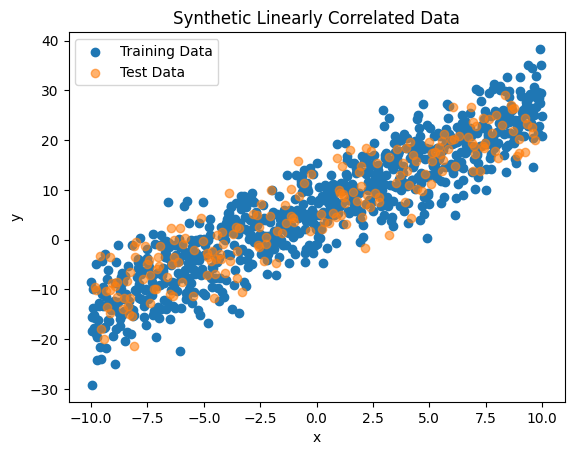

In [48]:
n_samples = 1000

x = np.linspace(-10, 10, n_samples) # 100 samples between -10 and 10

# generate y = 2x + 1
y = 2 * x + 1
# add noise
y += np.random.normal(5, 5, n_samples)


# reshape x and y to be column vectors
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x, y = shuffle(x, y, random_state=0)

# split into train and test sets
train_split = int(0.8 * n_samples)
test_split = n_samples - train_split

train_x, test_x = x[:train_split], x[train_split:]
train_y, test_y = y[:train_split], y[train_split:]

train_inputs = Tensor(train_x, requires_grad=True)
train_targets = Tensor(train_y, requires_grad=True)

test_inputs = Tensor(test_x, requires_grad=True)
test_targets = Tensor(test_y, requires_grad=True)

# Plot
plt.scatter(train_x, train_y, label="Training Data")
plt.scatter(test_x, test_y, label="Test Data", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [52]:
model = MLP([1, 10, 1], ReLU)
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

loss_history = []
for epoch in range(1000):
    # Forward pass
    pred = model(train_inputs)
    loss = criterion(pred, train_targets)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Zero out gradients
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.data:.3f}')
    
    loss_history.append(loss.data)

Epoch: 0, Loss: 203.039
Epoch: 100, Loss: 47.900
Epoch: 200, Loss: 32.450
Epoch: 300, Loss: 31.163
Epoch: 400, Loss: 30.079
Epoch: 500, Loss: 29.115
Epoch: 600, Loss: 28.311
Epoch: 700, Loss: 27.676
Epoch: 800, Loss: 27.195
Epoch: 900, Loss: 26.852


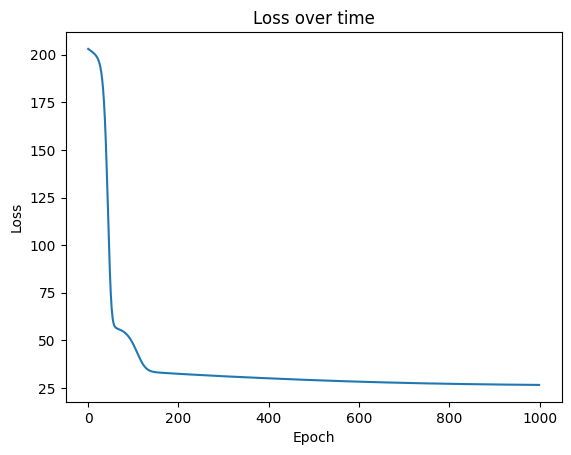

In [53]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.show()